## Import using package

In [5]:
import cv2
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

## Load image

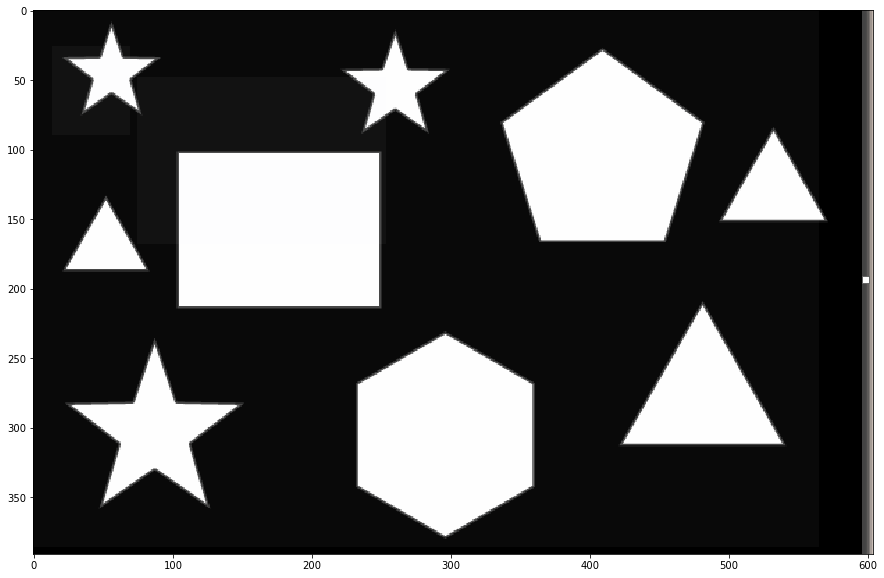

In [6]:
img = cv2.imread('../data/test.png')
plt.imshow(img)

## Convert image to binary

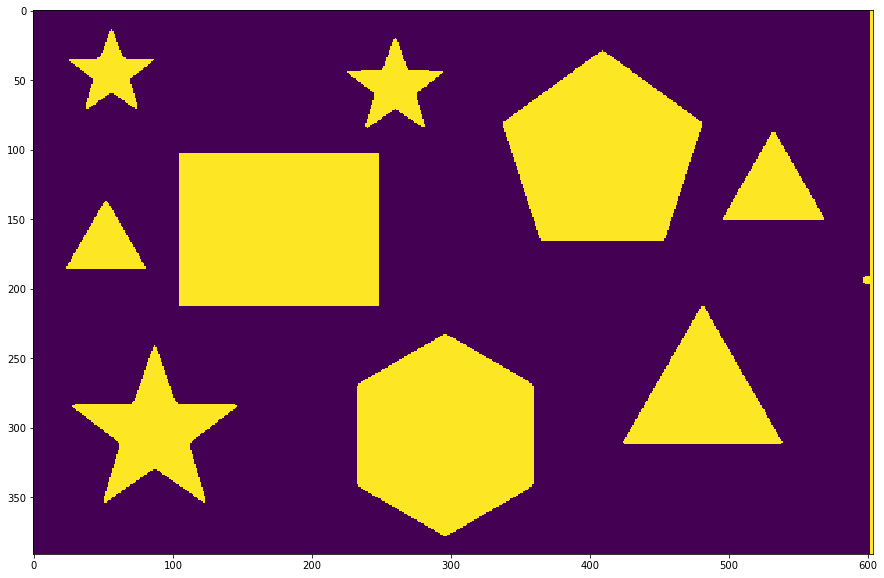

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 123, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh)

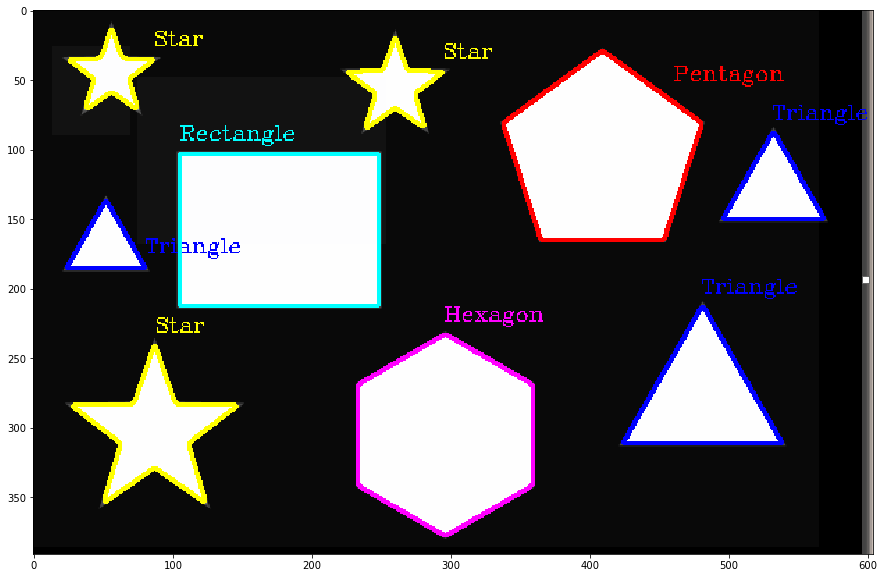

In [8]:
conts, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

font = cv2.FONT_HERSHEY_COMPLEX
res = img.copy()
for i in range(0, len(conts)):
#     (x, y, w, h) = cv2.boundingRect(conts[i])
    
#     cv2.rectangle(img, (x, y), (x + w, y + h), [0, 255, 0], 2)
    approx = cv2.approxPolyDP(conts[i], 0.01*cv2.arcLength(conts[i], True), True)
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 10
    if len(approx) == 3:
        cv2.drawContours(res, [conts[i]], 0, (0, 0, 255), 2)
        cv2.putText(res, "Triangle", (x, y), font, 0.5, (0, 0, 255))
    if len(approx) == 4:
        cv2.drawContours(res, [conts[i]], 0, (0, 255, 255), 2)
        cv2.putText(res, "Rectangle", (x, y), font, 0.5, (0, 255, 255))
    if len(approx) == 5:
        x -= 20
        y -= 20
        cv2.drawContours(res, [conts[i]], 0, (255, 0, 0), 2)
        cv2.putText(res, "Pentagon", (x, y), font, 0.5, (255, 0, 0))
    if len(approx) == 6:
        cv2.drawContours(res, [conts[i]], 0, (255, 0, 255), 2)
        cv2.putText(res, "Hexagon", (x, y), font, 0.5, (255, 0, 255))
    if len(approx) == 10:
        cv2.drawContours(res, [conts[i]], 0, (255, 255, 0), 2)
        cv2.putText(res, "Star", (x, y), font, 0.5, (255, 255, 0))
plt.imshow(res)